# Importing necessary libraries

In [ ]:
# Import necessary libraries

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
# Load dataset
file_path = 'mushrooms.csv'  # Replace with your file path
mushrooms_df = pd.read_csv(file_path)

In [ ]:
mushrooms_df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Preprocessing && Checking for null values

In [ ]:
# Checking for null values
mushrooms_df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [ ]:
# Get a list of columns with data type object
object_columns = mushrooms_df.select_dtypes(include=['object']).columns
print("Columns with object data type:", object_columns)


Columns with object data type: Index([], dtype='object')


# Encode Categorical Features

In [ ]:
# Encode categorical data
label_encoders = {}
for column in mushrooms_df.columns:
    le = LabelEncoder()
    mushrooms_df[column] = le.fit_transform(mushrooms_df[column])
    label_encoders[column] = le


In [ ]:
# Separate features and target variable
X = mushrooms_df.drop('class', axis=1)
y = mushrooms_df['class']

# K - means Clustering

In [ ]:
# --- K-means clustering ---
print("\n--- K-MEANS CLUSTERING ---")
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))



--- K-MEANS CLUSTERING ---


In [ ]:
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_optimal.fit(X)

print(f"Optimal number of clusters: {optimal_clusters}")
print(f"Highest silhouette score: {max(silhouette_scores):.4f}")
print("Explanation: Silhouette scores measure how well clusters are separated. Higher scores indicate better-defined clusters.")

Optimal number of clusters: 2
Highest silhouette score: 0.2870
Explanation: Silhouette scores measure how well clusters are separated. Higher scores indicate better-defined clusters.


# Plotting Silhouette Scores

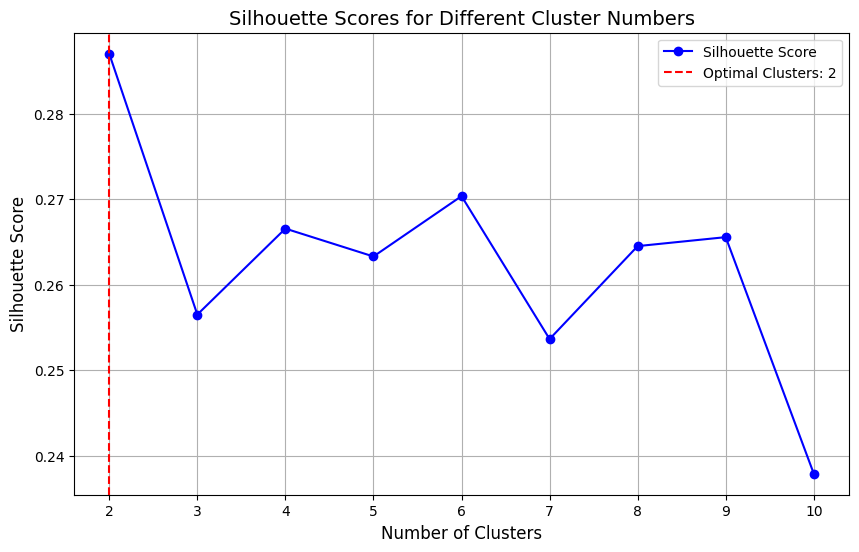

In [ ]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='b', label='Silhouette Score')
plt.title("Silhouette Scores for Different Cluster Numbers", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Optimal Clusters: {optimal_clusters}')
plt.legend()
plt.grid()
plt.show()


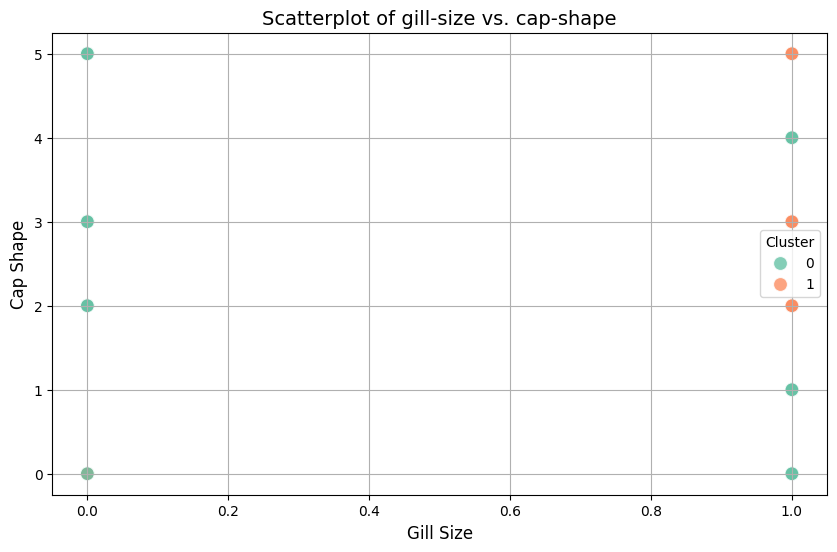

<ipython-input-18-4cbde95293fd>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mushrooms_df, x='Cluster', palette='viridis')


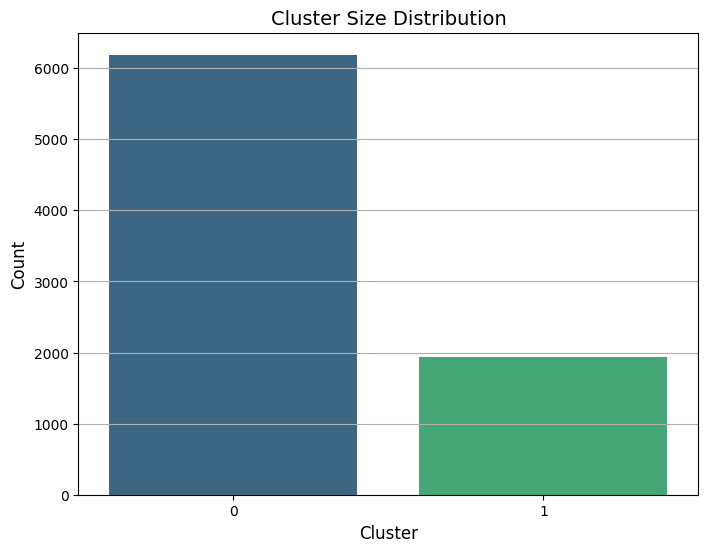

<ipython-input-18-4cbde95293fd>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mushrooms_df, x='Cluster', y='cap-surface', palette='Set3')


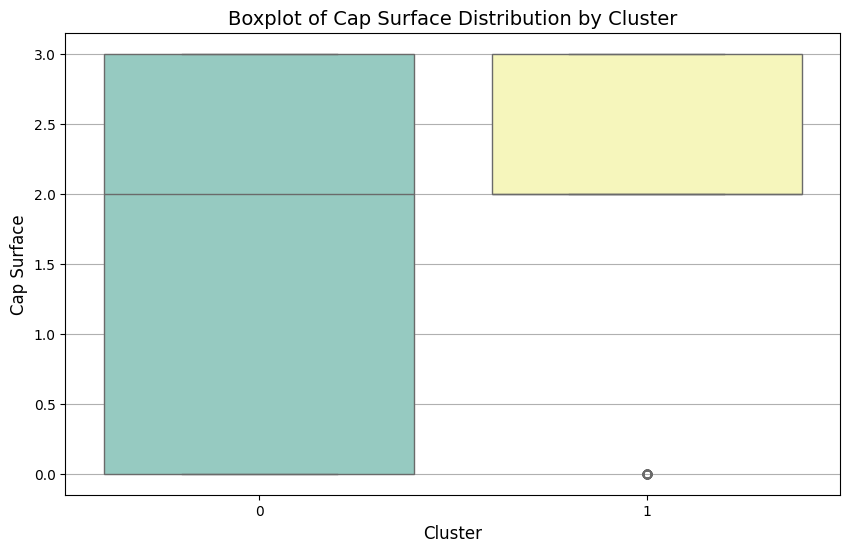

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add cluster labels to the original dataset for visualization
mushrooms_df['Cluster'] = kmeans_optimal.labels_

# --- Visualization 2: Feature vs. Feature Scatterplot ---
# Scatterplot for two features with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=mushrooms_df,
    x='gill-size',
    y='cap-shape',
    hue='Cluster',
    palette='Set2',
    s=100,
    alpha=0.8
)
plt.title("Scatterplot of gill-size vs. cap-shape", fontsize=14)
plt.xlabel("Gill Size", fontsize=12)
plt.ylabel("Cap Shape", fontsize=12)
plt.legend(title="Cluster")
plt.grid()
plt.show()

# --- Visualization 4: Countplot of Cluster Sizes ---
plt.figure(figsize=(8, 6))
sns.countplot(data=mushrooms_df, x='Cluster', palette='viridis')
plt.title("Cluster Size Distribution", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y')
plt.show()

# --- Visualization 5: Boxplots of Feature Distributions by Cluster ---
# Boxplot for a specific feature grouped by clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=mushrooms_df, x='Cluster', y='cap-surface', palette='Set3')
plt.title("Boxplot of Cap Surface Distribution by Cluster", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Cap Surface", fontsize=12)
plt.grid(axis='y')
plt.show()


# Naive Bayes Classification

In [ ]:
# --- Naive Bayes Classification ---
print("\n--- NAIVE BAYES CLASSIFICATION ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)



--- NAIVE BAYES CLASSIFICATION ---


GaussianNB()

# Plotting Confusion Matrix

Accuracy of Naive Bayes classifier: 0.9295
Explanation: Accuracy measures the proportion of correctly predicted edible or poisonous mushrooms.

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1257
           1       0.93      0.93      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



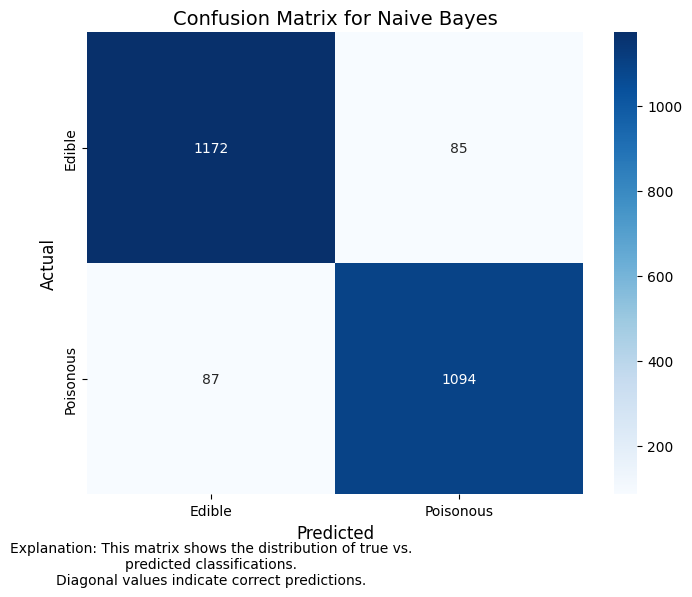

In [ ]:

# Assuming nb_classifier is your Naive Bayes classifier and X_test, y_test are your test data and labels

# Predict using the classifier
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy of Naive Bayes classifier: {accuracy:.4f}")
print("Explanation: Accuracy measures the proportion of correctly predicted edible or poisonous mushrooms.")

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and print Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title("Confusion Matrix for Naive Bayes", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.text(0.5, 2.2, "Explanation: This matrix shows the distribution of true vs. predicted classifications.\nDiagonal values indicate correct predictions.",
         fontsize=10, ha='center', va='top', wrap=True)
plt.show()